## Bike Sharing Assignment : Linear Regression

### Problem Statement: 
### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have contracted a consulting company to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
### 1. Which variables are significant in predicting the demand for shared bikes.
### 2. How well those variables describe the bike demands

In [782]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [783]:
# Importing the required libraries
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading and Understanding the 'Day' Dataset

In [784]:
# Reading the day.csv dataset
bikeshare_df = pd.read_csv(r"C:\Users\Binoj\Desktop\day.csv")
# Displays first 5 rows by default
bikeshare_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [785]:
# Returns the dataframe size
bikeshare_df.shape

(730, 16)

In [786]:
# Displays information about the dataset
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [787]:
# Returns the number of missing values in the dataset
bikeshare_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [788]:
# Displays the statistical summary
bikeshare_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [789]:
# Dropping the column 'instant' from the dataset as it's a record index
bikeshare_df.drop(['instant'], axis = 1, inplace = True)

In [790]:
# Dropping the column 'dteday' as we have this representation in yr and mnth columns
bikeshare_df.drop(['dteday'], axis = 1, inplace = True)

In [791]:
# Dropping columns 'casual' and 'registered' as this data combined is represented by 'cnt' column
bikeshare_df.drop(['casual','registered'], axis = 1, inplace = True)

In [792]:
# Displaying the dataset after performing drop
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [793]:
# Replacing 'season' column with appropriate values
bikeshare_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"}, inplace = True)

# Display first 5 rows after replacing season with actual values
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [794]:
# Replacing 'weekday' column with appropriate values 
bikeshare_df['weekday'].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thurs",5:"Fri",6:"Sat"}, inplace = True)

# Display first 5 rows after replacing weekday with appropriate values
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [795]:
# Replacing 'weathersit' column with appropriate values 
bikeshare_df['weathersit'].replace({1:"clear_partcloud",2:"mist_cloud",3:"light_rain_snow_thunderstrm",4:"heavyrain_ice_thunderstrmmist"}, inplace = True)

# Display first 5 rows after replacing weathersit with appropriate values
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Sat,0,mist_cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sun,0,mist_cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Mon,1,clear_partcloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tue,1,clear_partcloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wed,1,clear_partcloud,9.305237,11.46350,43.6957,12.522300,1600


## 2. Visualisation of the 'Day' Dataset

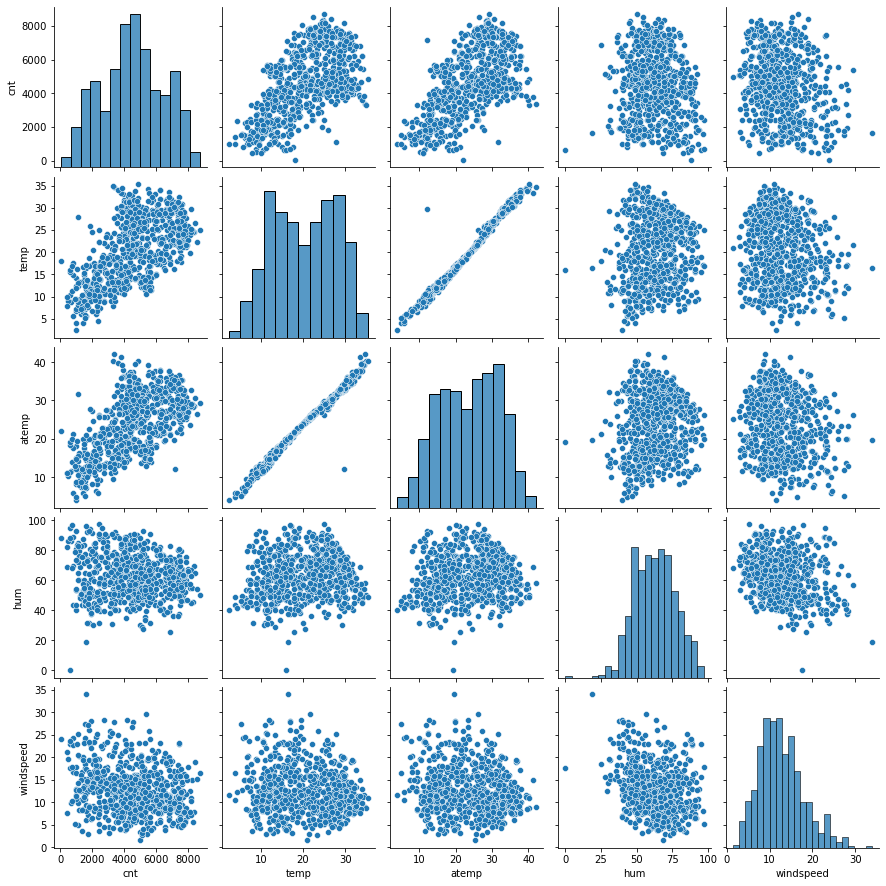

In [796]:
# Pairplot to visualize the numeric variables
sns.pairplot(data = bikeshare_df, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

## Observation: It's observed numeric variables 'temp' and 'atemp' are highly correlated to the target variable 'cnt' 

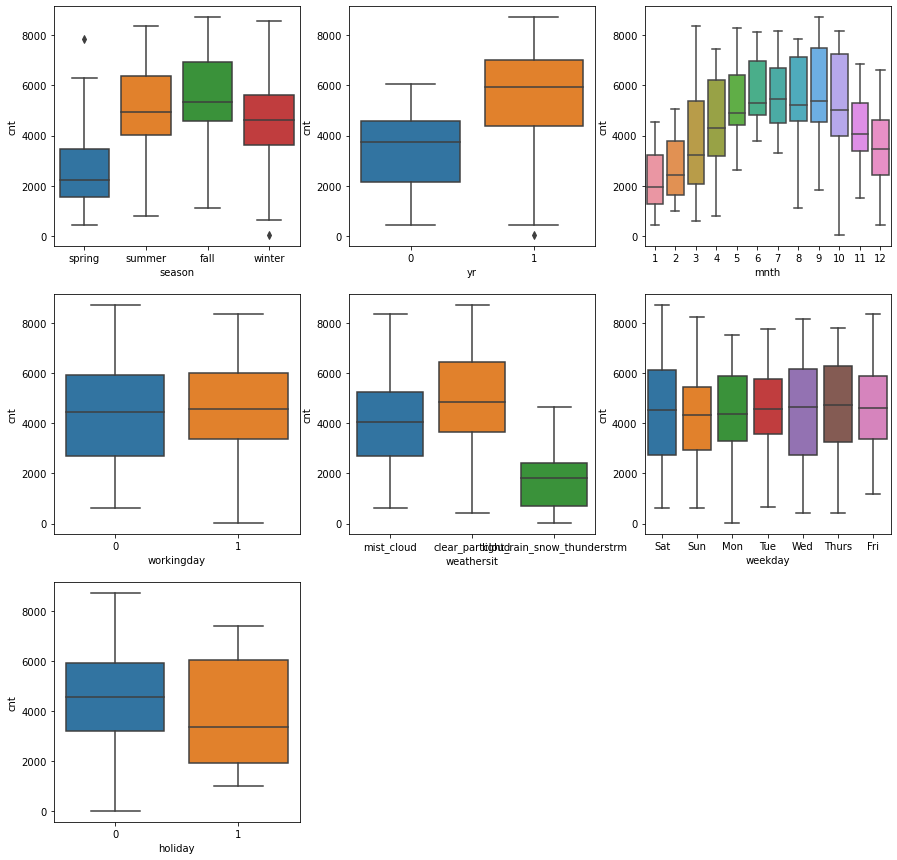

In [797]:
# Visualising categorical Variables through boxplot
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare_df)
plt.show()

## Observations:
### 1. Fall has the highest count of riders whereas spring has the lowest count of riders.
### 2. Significant rise in riders from 2018 to 2019 (0: 2018 | 1:2019)
### 3. Under weathersit, clear_partcloud weather has the highest riders and light_rain_snow_thunderstrm has the lowest rider count
### 4. Month-wise, September has the higest riders count whereas January month accounts of the lowest

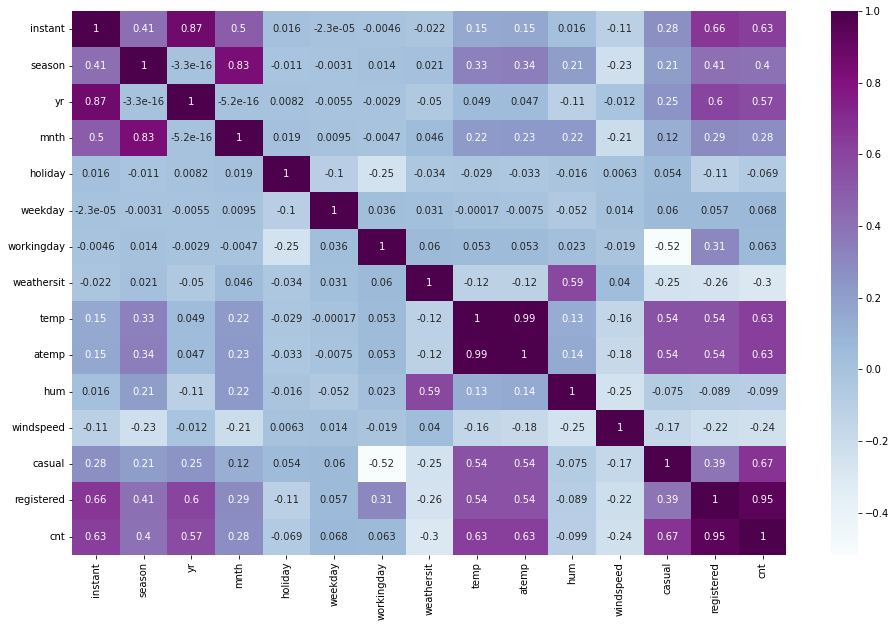

In [798]:
# Checking the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="BuPu")
plt.show()

## Observations
#### 1. It's observed that correlation between temp and atemp is 0.99 ~ equals 1

## 3. Data preparation for Linear regression

In [799]:
# Create dummy variables for categorical variables season, weathersit, weekday and mnth
season_dumm = pd.get_dummies(bikeshare_df['season'],drop_first = True)
weathersit_dumm = pd.get_dummies(bikeshare_df['weathersit'],drop_first = True)
weekday_dumm = pd.get_dummies(bikeshare_df['weekday'],drop_first = True)
month_dumm = pd.get_dummies(bikeshare_df['mnth'],drop_first = True)

In [800]:
# View columns after dummy variables creation
bikeshare_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [801]:
# Perform concatenation for axis 1
bikeshare_df = pd.concat([bikeshare_df,season_dumm,weathersit_dumm,weekday_dumm,month_dumm], axis = 1)

In [802]:
# Returns information on the dataset
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   season                       730 non-null    object 
 1   yr                           730 non-null    int64  
 2   mnth                         730 non-null    int64  
 3   holiday                      730 non-null    int64  
 4   weekday                      730 non-null    object 
 5   workingday                   730 non-null    int64  
 6   weathersit                   730 non-null    object 
 7   temp                         730 non-null    float64
 8   atemp                        730 non-null    float64
 9   hum                          730 non-null    float64
 10  windspeed                    730 non-null    float64
 11  cnt                          730 non-null    int64  
 12  spring                       730 non-null    uint8  
 13  summer              

In [803]:
# Dropping columns 'season','mnth','weekday' and 'weathersit'
bikeshare_df = bikeshare_df.drop(['season','mnth','weekday','weathersit'], axis = 1)

In [804]:
# View the few rows of the dataset after performing drop
bikeshare_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Divide the data to Train and Test

In [805]:
# Importing the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [806]:
# Split data into train and test sets.
np.random.seed(0)
df_train, df_test = train_test_split(bikeshare_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [807]:
# Displays the rows of the train set
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,1,0,0,0,0,0,0,0,0


In [808]:
# Displays the rows of the test set
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [809]:
# Displays the shape of the train-test sets
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [810]:
# Perform scaling on continuous variables
scaler=MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [811]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,0


In [812]:
# Viewing the statistical summary from Train set after scaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Building a linear model

In [813]:
# Dividing X and y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [814]:
# Viewing first 5 rows by default
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [815]:
# Viewing the first 5 rows by default
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [816]:
# Adopting RFE approach for feature selection, limiting to 15 variables using mixed approach to model building.
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [817]:
# Viewing columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('light_rain_snow_thunderstrm', True, 1),
 ('mist_cloud', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 3),
 ('Sun', False, 8),
 ('Thurs', False, 14),
 ('Tue', False, 10),
 ('Wed', False, 15),
 (2, False, 7),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 11),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 12),
 (12, False, 13)]

In [818]:
# Viewing columns selected by RFE and manual elimination to be performed on these columns accordingly
col = X_train.columns[rfe.support_]
col

Index([                         'yr',                     'holiday',
                              'temp',                         'hum',
                         'windspeed',                      'spring',
                            'winter', 'light_rain_snow_thunderstrm',
                        'mist_cloud',                             3,
                                   4,                             5,
                                   6,                             8,
                                   9],
      dtype='object')

In [819]:
# Viewing features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday',      'atemp',     'summer',        'Mon',        'Sat',
              'Sun',      'Thurs',        'Tue',        'Wed',            2,
                  7,           10,           11,           12],
      dtype='object')

In [820]:
# Model building using statsmodel api calling the add_constant function
X_train_rfe = X_train[col]
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          9.99e-188
Time:                        23:52:11   Log-Likelihood:                 511.20
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2867      0.034      8.537      0.000       0.221       0.353
yr                              0.2307      0.008     28.326      0.000       0.215       0.247
holiday                        -0.0882      0.026     -3.440      0.001      -0.139      -0.038
temp                            0.4598      0.032     14.198      0.000       0.396       0.523
hum                            -0.1578      0.038     -4.145      0.000      -0.233      -0.083
windspeed                      -0.1794      0.026     -6.923      0.000      -0.230      -0.128
spring                         -0.0632      0.019     -3.348      0.001      -0.100      -0.026
winter                          0.1151      0.016      6.992      0.000       0.083       0.148
light_rain_snow_thunderstrm    -0.2413      0.026     -9.132      0.000      -0.293      -0.189
mist_cloud                     -0.0561      0.011     -5.334      0.000      -0.077      -0.035
3                               0.0623      0.015      4.133      0.000       0.033       0.092
4                               0.0725      0.020      3.603      0.000       0.033       0.112
5                               0.0969      0.019      5.194      0.000       0.060       0.134
6                               0.0553      0.019      2.881      0.004       0.018       0.093
8                               0.0506      0.018      2.808      0.005       0.015       0.086
9                               0.1153      0.017      6.649      0.000       0.081       0.149
==============================================================================
Omnibus:                       61.189   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.510
Skew:                          -0.627   Prob(JB):                     5.64e-33
Kurtosis:                       5.328   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [821]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,25.74
2,temp,16.09
4,windspeed,4.69
5,spring,3.62
6,winter,3.29
8,mist_cloud,2.26
0,yr,2.09
13,8,1.93
11,5,1.77
10,4,1.69


In [822]:
# Dropping column 'hum' having high VIF
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

In [823]:
# Viewing the regression summary after dropping column 'hum'
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.23e-185
Time:                        23:52:13   Log-Likelihood:                 502.48
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2030      0.027      7.445      0.000       0.149       0.257
yr                              0.2342      0.008     28.441      0.000       0.218       0.250
holiday                        -0.0888      0.026     -3.410      0.001      -0.140      -0.038
temp                            0.4320      0.032     13.418      0.000       0.369       0.495
windspeed                      -0.1503      0.025     -5.931      0.000      -0.200      -0.101
spring                         -0.0690      0.019     -3.606      0.000      -0.107      -0.031
winter                          0.1037      0.016      6.284      0.000       0.071       0.136
light_rain_snow_thunderstrm    -0.2844      0.025    -11.521      0.000      -0.333      -0.236
mist_cloud                     -0.0810      0.009     -9.219      0.000      -0.098      -0.064
3                               0.0633      0.015      4.135      0.000       0.033       0.093
4                               0.0726      0.020      3.549      0.000       0.032       0.113
5                               0.0863      0.019      4.594      0.000       0.049       0.123
6                               0.0597      0.019      3.068      0.002       0.021       0.098
8                               0.0498      0.018      2.717      0.007       0.014       0.086
9                               0.1097      0.018      6.246      0.000       0.075       0.144
==============================================================================
Omnibus:                       61.507   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.932
Skew:                          -0.639   Prob(JB):                     3.38e-32
Kurtosis:                       5.277   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [824]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,6.49
3,windspeed,4.68
4,spring,2.10
0,yr,2.08
5,winter,1.94
12,8,1.91
11,6,1.65
10,5,1.59
7,mist_cloud,1.55
9,4,1.53


In [825]:
# Dropping column 'temp' due to higher VIF
X_train_rfe = X_train_rfe.drop(['temp'],axis = 1)

In [826]:
# Viewing the regression summary after dropping column 'hum'
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.90e-153
Time:                        23:52:14   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.5082      0.018     28.983      0.000       0.474       0.543
yr                              0.2479      0.010     26.013      0.000       0.229       0.267
holiday                        -0.0886      0.030     -2.916      0.004      -0.148      -0.029
windspeed                      -0.1645      0.030     -5.566      0.000      -0.223      -0.106
spring                         -0.2392      0.017    -14.308      0.000      -0.272      -0.206
winter                         -0.0080      0.017     -0.482      0.630      -0.041       0.025
light_rain_snow_thunderstrm    -0.2896      0.029    -10.056      0.000      -0.346      -0.233
mist_cloud                     -0.0943      0.010     -9.257      0.000      -0.114      -0.074
3                               0.0494      0.018      2.772      0.006       0.014       0.084
4                              -0.0153      0.023     -0.676      0.499      -0.060       0.029
5                               0.0671      0.022      3.072      0.002       0.024       0.110
6                               0.0901      0.023      3.995      0.000       0.046       0.134
8                               0.0929      0.021      4.418      0.000       0.052       0.134
9                               0.1318      0.020      6.456      0.000       0.092       0.172
==============================================================================
Omnibus:                       35.107   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.924
Skew:                          -0.372   Prob(JB):                     7.28e-18
Kurtosis:                       4.777   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [827]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,mist_cloud,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [828]:
# Dropping column 'windspeed' having high VIF
X_train_rfe = X_train_rfe.drop(['windspeed'],axis = 1)

In [829]:
# Viewing the regression summary after dropping column 'windspeed'
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          9.96e-148
Time:                        23:52:16   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4616      0.016     29.102      0.000       0.430       0.493
yr                              0.2478      0.010     25.245      0.000       0.228       0.267
holiday                        -0.0918      0.031     -2.935      0.003      -0.153      -0.030
spring                         -0.2516      0.017    -14.740      0.000      -0.285      -0.218
winter                         -0.0093      0.017     -0.544      0.587      -0.043       0.024
light_rain_snow_thunderstrm    -0.3052      0.030    -10.342      0.000      -0.363      -0.247
mist_cloud                     -0.0934      0.010     -8.907      0.000      -0.114      -0.073
3                               0.0395      0.018      2.166      0.031       0.004       0.075
4                              -0.0386      0.023     -1.691      0.092      -0.084       0.006
5                               0.0638      0.022      2.838      0.005       0.020       0.108
6                               0.0874      0.023      3.763      0.000       0.042       0.133
8                               0.0961      0.022      4.439      0.000       0.054       0.139
9                               0.1381      0.021      6.580      0.000       0.097       0.179
==============================================================================
Omnibus:                       43.939   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.742
Skew:                          -0.401   Prob(JB):                     3.67e-27
Kurtosis:                       5.255   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [830]:
# Dropping column 'winter' with very high p-value
X_train_rfe = X_train_rfe.drop(['winter'], axis = 1)

In [831]:
# Viewing the regression summary after dropping column 'winter'
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          9.28e-149
Time:                        23:52:17   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4552      0.011     42.608      0.000       0.434       0.476
yr                              0.2478      0.010     25.263      0.000       0.228       0.267
holiday                        -0.0924      0.031     -2.956      0.003      -0.154      -0.031
spring                         -0.2457      0.013    -18.510      0.000      -0.272      -0.220
light_rain_snow_thunderstrm    -0.3060      0.029    -10.389      0.000      -0.364      -0.248
mist_cloud                     -0.0938      0.010     -8.976      0.000      -0.114      -0.073
3                               0.0423      0.017      2.421      0.016       0.008       0.077
4                              -0.0321      0.019     -1.653      0.099      -0.070       0.006
5                               0.0704      0.019      3.711      0.000       0.033       0.108
6                               0.0938      0.020      4.703      0.000       0.055       0.133
8                               0.1026      0.018      5.698      0.000       0.067       0.138
9                               0.1426      0.019      7.422      0.000       0.105       0.180
==============================================================================
Omnibus:                       44.016   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.952
Skew:                          -0.402   Prob(JB):                     3.30e-27
Kurtosis:                       5.257   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [832]:
# Dropping column '4' with high p-value
X_train_rfe = X_train_rfe.drop([4], axis = 1)

In [833]:
# Viewing the regression summary after dropping column 'winter'
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe5).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.76e-149
Time:                        23:52:18   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4493      0.010     44.546      0.000       0.429       0.469
yr                              0.2469      0.010     25.167      0.000       0.228       0.266
holiday                        -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                         -0.2402      0.013    -18.666      0.000      -0.265      -0.215
light_rain_snow_thunderstrm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
mist_cloud                     -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                               0.0450      0.017      2.581      0.010       0.011       0.079
5                               0.0767      0.019      4.119      0.000       0.040       0.113
6                               0.1002      0.020      5.108      0.000       0.062       0.139
8                               0.1090      0.018      6.186      0.000       0.074       0.144
9                               0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [834]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,mist_cloud,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,light_rain_snow_thunderstrm,1.02


In [835]:
# Adding saturday and check if model improves
X_train_rfe['Sat'] = X_train['Sat']
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,Sat
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,1
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1


In [836]:
# Viewing the regression summary after adding 'sat'
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.47e-148
Time:                        23:52:20   Log-Likelihood:                 406.77
No. Observations:                 510   AIC:                            -789.5
Df Residuals:                     498   BIC:                            -738.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4473      0.010     43.229      0.000       0.427       0.468
yr                              0.2472      0.010     25.176      0.000       0.228       0.266
holiday                        -0.0897      0.031     -2.858      0.004      -0.151      -0.028
spring                         -0.2403      0.013    -18.670      0.000      -0.266      -0.215
light_rain_snow_thunderstrm    -0.3043      0.029    -10.319      0.000      -0.362      -0.246
mist_cloud                     -0.0939      0.010     -8.964      0.000      -0.114      -0.073
3                               0.0449      0.017      2.573      0.010       0.011       0.079
5                               0.0775      0.019      4.156      0.000       0.041       0.114
6                               0.1002      0.020      5.106      0.000       0.062       0.139
8                               0.1090      0.018      6.182      0.000       0.074       0.144
9                               0.1489      0.019      7.884      0.000       0.112       0.186
Sat                             0.0118      0.014      0.867      0.386      -0.015       0.038
==============================================================================
Omnibus:                       42.791   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.225
Skew:                          -0.408   Prob(JB):                     4.27e-25
Kurtosis:                       5.148   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [837]:
# Dropping 'sat' as it has very high p-value
X_train_rfe = X_train_rfe.drop(['Sat'], axis=1)

In [838]:
# Viewing the regression summary
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.76e-149
Time:                        23:52:21   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4493      0.010     44.546      0.000       0.429       0.469
yr                              0.2469      0.010     25.167      0.000       0.228       0.266
holiday                        -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                         -0.2402      0.013    -18.666      0.000      -0.265      -0.215
light_rain_snow_thunderstrm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
mist_cloud                     -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                               0.0450      0.017      2.581      0.010       0.011       0.079
5                               0.0767      0.019      4.119      0.000       0.040       0.113
6                               0.1002      0.020      5.108      0.000       0.062       0.139
8                               0.1090      0.018      6.186      0.000       0.074       0.144
9                               0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [839]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,mist_cloud,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,light_rain_snow_thunderstrm,1.02


In [840]:
# Adding 'workingday' and check if model improves
X_train_rfe['workingday']=X_train['workingday']
# Displays first 5 rows by default and checks if working day is added
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,workingday
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [841]:
# Viewing the regression summary
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          7.14e-149
Time:                        23:52:23   Log-Likelihood:                 408.05
No. Observations:                 510   AIC:                            -792.1
Df Residuals:                     498   BIC:                            -741.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4368      0.012     35.775      0.000       0.413       0.461
yr                              0.2464      0.010     25.158      0.000       0.227       0.266
holiday                        -0.0786      0.032     -2.454      0.014      -0.142      -0.016
spring                         -0.2400      0.013    -18.692      0.000      -0.265      -0.215
light_rain_snow_thunderstrm    -0.3052      0.029    -10.372      0.000      -0.363      -0.247
mist_cloud                     -0.0943      0.010     -9.027      0.000      -0.115      -0.074
3                               0.0439      0.017      2.522      0.012       0.010       0.078
5                               0.0748      0.019      4.019      0.000       0.038       0.111
6                               0.0997      0.020      5.097      0.000       0.061       0.138
8                               0.1078      0.018      6.124      0.000       0.073       0.142
9                               0.1475      0.019      7.824      0.000       0.110       0.185
workingday                      0.0194      0.011      1.806      0.071      -0.002       0.041
==============================================================================
Omnibus:                       38.813   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.547
Skew:                          -0.311   Prob(JB):                     8.11e-26
Kurtosis:                       5.247   Cond. No.                         9.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [842]:
# Dropping 'workingday' because of high p-value
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [843]:
# Viewing the regression summary
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.76e-149
Time:                        23:52:24   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4493      0.010     44.546      0.000       0.429       0.469
yr                              0.2469      0.010     25.167      0.000       0.228       0.266
holiday                        -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                         -0.2402      0.013    -18.666      0.000      -0.265      -0.215
light_rain_snow_thunderstrm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
mist_cloud                     -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                               0.0450      0.017      2.581      0.010       0.011       0.079
5                               0.0767      0.019      4.119      0.000       0.040       0.113
6                               0.1002      0.020      5.108      0.000       0.062       0.139
8                               0.1090      0.018      6.186      0.000       0.074       0.144
9                               0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [844]:
# Adding Sunday and check if model improves
X_train_rfe['Sun']=X_train['Sun']
# Displays first 5 rows by default and checks if working day is added
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,Sun
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0


In [845]:
# Viewing the regression summary
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.81e-150
Time:                        23:52:25   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4579      0.010     44.346      0.000       0.438       0.478
yr                              0.2468      0.010     25.401      0.000       0.228       0.266
holiday                        -0.0993      0.031     -3.194      0.001      -0.160      -0.038
spring                         -0.2403      0.013    -18.852      0.000      -0.265      -0.215
light_rain_snow_thunderstrm    -0.3086      0.029    -10.557      0.000      -0.366      -0.251
mist_cloud                     -0.0956      0.010     -9.204      0.000      -0.116      -0.075
3                               0.0419      0.017      2.423      0.016       0.008       0.076
5                               0.0754      0.018      4.087      0.000       0.039       0.112
6                               0.0992      0.019      5.107      0.000       0.061       0.137
8                               0.1058      0.017      6.055      0.000       0.071       0.140
9                               0.1461      0.019      7.806      0.000       0.109       0.183
Sun                            -0.0456      0.014     -3.280      0.001      -0.073      -0.018
==============================================================================
Omnibus:                       42.945   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.971
Skew:                          -0.365   Prob(JB):                     2.68e-28
Kurtosis:                       5.333   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [846]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.54
2,spring,1.41
4,mist_cloud,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sun,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [847]:
# Adding month 7 and check if model improves
X_train_rfe[7] = X_train[7]
# Displays first 5 rows and check if month 7 being added
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,Sun,7
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [848]:
# Viewing the regression summary
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     146.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.03e-154
Time:                        23:52:27   Log-Likelihood:                 424.54
No. Observations:                 510   AIC:                            -823.1
Df Residuals:                     497   BIC:                            -768.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4373      0.011     40.197      0.000       0.416       0.459
yr                              0.2463      0.009     25.958      0.000       0.228       0.265
holiday                        -0.0887      0.030     -2.915      0.004      -0.148      -0.029
spring                         -0.2242      0.013    -17.460      0.000      -0.249      -0.199
light_rain_snow_thunderstrm    -0.2998      0.029    -10.484      0.000      -0.356      -0.244
mist_cloud                     -0.0895      0.010     -8.763      0.000      -0.110      -0.069
3                               0.0501      0.017      2.953      0.003       0.017       0.083
5                               0.0934      0.018      5.087      0.000       0.057       0.129
6                               0.1190      0.019      6.143      0.000       0.081       0.157
8                               0.1245      0.017      7.130      0.000       0.090       0.159
9                               0.1635      0.019      8.791      0.000       0.127       0.200
Sun                            -0.0458      0.014     -3.367      0.001      -0.072      -0.019
7                               0.0965      0.019      5.039      0.000       0.059       0.134
==============================================================================
Omnibus:                       42.644   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.373
Skew:                          -0.327   Prob(JB):                     1.48e-30
Kurtosis:                       5.457   Cond. No.                         8.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation : Month 7 is retained as significant improvement in model

In [849]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.62
2,spring,1.42
4,mist_cloud,1.37
5,3,1.23
8,8,1.13
10,Sun,1.12
6,5,1.11
9,9,1.11
11,7,1.08
7,6,1.07


In [850]:
# Adding month 10 and check if model improves
X_train_rfe[10] = X_train[10]
# Displays first 5 rows and check if month 10 being added
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,Sun,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [851]:
# Viewing the regression summary
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.24e-162
Time:                        23:52:29   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4085      0.011     35.898      0.000       0.386       0.431
yr                              0.2469      0.009     27.063      0.000       0.229       0.265
holiday                        -0.0836      0.029     -2.857      0.004      -0.141      -0.026
spring                         -0.1980      0.013    -15.229      0.000      -0.224      -0.172
light_rain_snow_thunderstrm    -0.3212      0.028    -11.596      0.000      -0.376      -0.267
mist_cloud                     -0.0907      0.010     -9.235      0.000      -0.110      -0.071
3                               0.0635      0.016      3.860      0.000       0.031       0.096
5                               0.1230      0.018      6.744      0.000       0.087       0.159
6                               0.1483      0.019      7.734      0.000       0.111       0.186
8                               0.1538      0.017      8.840      0.000       0.120       0.188
9                               0.1937      0.018     10.475      0.000       0.157       0.230
Sun                            -0.0498      0.013     -3.806      0.000      -0.075      -0.024
7                               0.1264      0.019      6.656      0.000       0.089       0.164
10                              0.1168      0.018      6.438      0.000       0.081       0.153
==============================================================================
Omnibus:                       81.612   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.309
Skew:                          -0.652   Prob(JB):                     4.20e-73
Kurtosis:                       6.740   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation : Month 10 is retained as it's addition further improves the model

In [852]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,mist_cloud,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sun,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [853]:
# Adding month 11 and check if model improves
X_train_rfe[11] = X_train[11]
# Displays first 5 rows and check if month 11 being added
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,Sun,7,10,11
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [854]:
# Viewing the regression summary
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.70e-161
Time:                        23:52:32   Log-Likelihood:                 445.42
No. Observations:                 510   AIC:                            -860.8
Df Residuals:                     495   BIC:                            -797.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4023      0.013     30.292      0.000       0.376       0.428
yr                              0.2471      0.009     27.072      0.000       0.229       0.265
holiday                        -0.0865      0.029     -2.938      0.003      -0.144      -0.029
spring                         -0.1925      0.014    -13.391      0.000      -0.221      -0.164
light_rain_snow_thunderstrm    -0.3217      0.028    -11.612      0.000      -0.376      -0.267
mist_cloud                     -0.0905      0.010     -9.210      0.000      -0.110      -0.071
3                               0.0660      0.017      3.956      0.000       0.033       0.099
5                               0.1291      0.019      6.642      0.000       0.091       0.167
6                               0.1544      0.020      7.596      0.000       0.114       0.194
8                               0.1598      0.019      8.577      0.000       0.123       0.196
9                               0.1999      0.020     10.134      0.000       0.161       0.239
Sun                            -0.0501      0.013     -3.825      0.000      -0.076      -0.024
7                               0.1325      0.020      6.573      0.000       0.093       0.172
10                              0.1231      0.019      6.340      0.000       0.085       0.161
11                              0.0175      0.019      0.904      0.366      -0.021       0.056
==============================================================================
Omnibus:                       83.073   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.709
Skew:                          -0.660   Prob(JB):                     1.40e-75
Kurtosis:                       6.805   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [855]:
# Dropping month 11 due to high p-value
X_train_rfe = X_train_rfe.drop([11], axis = 1)
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,Sun,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [856]:
# Viewing the regression summary
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.24e-162
Time:                        23:52:33   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4085      0.011     35.898      0.000       0.386       0.431
yr                              0.2469      0.009     27.063      0.000       0.229       0.265
holiday                        -0.0836      0.029     -2.857      0.004      -0.141      -0.026
spring                         -0.1980      0.013    -15.229      0.000      -0.224      -0.172
light_rain_snow_thunderstrm    -0.3212      0.028    -11.596      0.000      -0.376      -0.267
mist_cloud                     -0.0907      0.010     -9.235      0.000      -0.110      -0.071
3                               0.0635      0.016      3.860      0.000       0.031       0.096
5                               0.1230      0.018      6.744      0.000       0.087       0.159
6                               0.1483      0.019      7.734      0.000       0.111       0.186
8                               0.1538      0.017      8.840      0.000       0.120       0.188
9                               0.1937      0.018     10.475      0.000       0.157       0.230
Sun                            -0.0498      0.013     -3.806      0.000      -0.075      -0.024
7                               0.1264      0.019      6.656      0.000       0.089       0.164
10                              0.1168      0.018      6.438      0.000       0.081       0.153
==============================================================================
Omnibus:                       81.612   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.309
Skew:                          -0.652   Prob(JB):                     4.20e-73
Kurtosis:                       6.740   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [857]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,mist_cloud,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sun,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [858]:
# Adding month 12 and check if model improves
X_train_rfe[12] = X_train[12]
# Displays first 5 rows and check if month 12 being added
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,Sun,7,10,12
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [859]:
# Viewing the regression summary
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          4.05e-161
Time:                        23:52:35   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -860.0
Df Residuals:                     495   BIC:                            -796.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4085      0.012     33.067      0.000       0.384       0.433
yr                              0.2469      0.009     27.013      0.000       0.229       0.265
holiday                        -0.0836      0.029     -2.851      0.005      -0.141      -0.026
spring                         -0.1980      0.013    -15.075      0.000      -0.224      -0.172
light_rain_snow_thunderstrm    -0.3212      0.028    -11.583      0.000      -0.376      -0.267
mist_cloud                     -0.0907      0.010     -9.225      0.000      -0.110      -0.071
3                               0.0635      0.017      3.772      0.000       0.030       0.097
5                               0.1230      0.019      6.530      0.000       0.086       0.160
6                               0.1483      0.020      7.514      0.000       0.109       0.187
8                               0.1538      0.018      8.540      0.000       0.118       0.189
9                               0.1936      0.019     10.166      0.000       0.156       0.231
Sun                            -0.0498      0.013     -3.802      0.000      -0.076      -0.024
7                               0.1263      0.020      6.464      0.000       0.088       0.165
10                              0.1168      0.019      6.239      0.000       0.080       0.154
12                             -0.0002      0.018     -0.010      0.992      -0.035       0.035
==============================================================================
Omnibus:                       81.617   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.333
Skew:                          -0.652   Prob(JB):                     4.15e-73
Kurtosis:                       6.740   Cond. No.                         9.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [860]:
# Dropping month 12 due to high p-value
X_train_rfe = X_train_rfe.drop([12], axis = 1)

In [861]:
# Adding summer and check if model improves
X_train_rfe['summer'] = X_train['summer']
# Displays first 5 rows and check if summer being added
X_train_rfe.head()

,yr,holiday,spring,light_rain_snow_thunderstrm,mist_cloud,3,5,6,8,9,Sun,7,10,summer
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [862]:
# Viewing the regression summary
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.17e-161
Time:                        23:52:36   Log-Likelihood:                 445.26
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     495   BIC:                            -797.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4130      0.013     31.533      0.000       0.387       0.439
yr                              0.2471      0.009     27.058      0.000       0.229       0.265
holiday                        -0.0842      0.029     -2.875      0.004      -0.142      -0.027
spring                         -0.2035      0.015    -13.435      0.000      -0.233      -0.174
light_rain_snow_thunderstrm    -0.3214      0.028    -11.598      0.000      -0.376      -0.267
mist_cloud                     -0.0905      0.010     -9.206      0.000      -0.110      -0.071
3                               0.0665      0.017      3.912      0.000       0.033       0.100
5                               0.1299      0.021      6.276      0.000       0.089       0.171
6                               0.1509      0.020      7.722      0.000       0.113       0.189
8                               0.1491      0.019      7.982      0.000       0.112       0.186
9                               0.1890      0.020      9.608      0.000       0.150       0.228
Sun                            -0.0498      0.013     -3.807      0.000      -0.076      -0.024
7                               0.1217      0.020      6.045      0.000       0.082       0.161
10                              0.1122      0.019      5.800      0.000       0.074       0.150
summer                         -0.0116      0.017     -0.704      0.482      -0.044       0.021
==============================================================================
Omnibus:                       81.268   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.966
Skew:                          -0.644   Prob(JB):                     1.11e-73
Kurtosis:                       6.762   Cond. No.                         9.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [863]:
# Calculating and viewing VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,summer,2.44
0,yr,1.80
6,5,1.74
2,spring,1.58
4,mist_cloud,1.48
5,3,1.37
7,6,1.28
12,10,1.19
8,8,1.16
10,Sun,1.15


### Overall Observation:
### It's observed that model lm12 provides the best results amongst the models built considering different variables. Hence, we choose model lm12

## 6. Model Evaluation

In [864]:
# Calculating the residuals
y_train_cnt = lm12.predict(X_train_rfe14)
res = y_train - y_train_cnt
res

653    0.092032
576    0.045905
426    0.035105
728   -0.203458
482   -0.081702
         ...   
526    0.051176
578    0.023658
53     0.007588
350   -0.005178
79    -0.144845
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

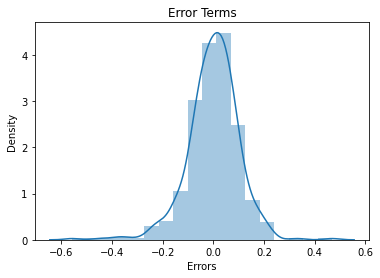

In [865]:
# Plot a histogram for error terms
fig = plt.figure()
sns.distplot((res), bins = 18)
plt.title('Error Terms')
plt.xlabel('Errors')

### Observation: Error terms are normally distributed and mean of the error terms is 0 

In [866]:
# Calculating mean of the residuals
mean_res = round(np.mean(res))
mean_res

0

In [867]:
bikeshare_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [868]:
# Scaling the test data
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [869]:
# Creating x and y test sets
y_test = df_test.pop('cnt')
X_test = df_test

In [870]:
# Employ our model to make predictions. Create X_test_new dropping variables from X_test
X_train_new = X_train_rfe12.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

Text(0, 0.5, 'y_pred')

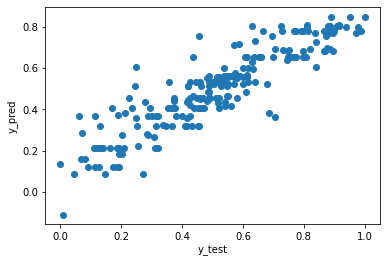

In [871]:
# Making predictions on the chosen model
y_pred = lm12.predict(X_test_new)
# Checking pred vs test data
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Observation: It's observed actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [872]:
# Returns mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.10573120032920401

In [873]:
# Returns r-square calculation for test
r_sqrt = r2_score(y_test,y_pred)
(r_sqrt)*100

80.29017439604785

### Observation: It's observed that the above r-square output of 80.29 is almost equal to the r-square derived from our chosen model lm12 which is 79.7

Text(0, 0.5, 'Residuals')

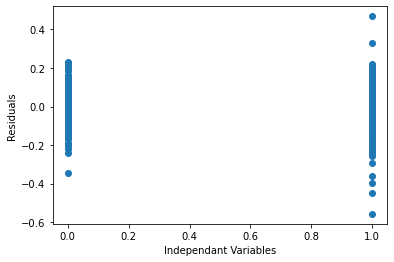

In [874]:
# Plot residuals for observing patterns, if any and check for homoscedasticity and autocorrelation
X_train_p = X_train_new.iloc[:,0]
plt.figure()
plt.scatter(X_train_p,res)
plt.xlabel('Independant Variables')
plt.ylabel('Residuals')

### Observation: With time series data (example: year), regression is likely to have autocorrelation as one variable is dependent on the other. Therefore, error terms for different observations will also be correlated to each other.

In [875]:
# Viewing model lm12 regression summary which we have chosen after our model building
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.24e-162
Time:                        23:52:48   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4085      0.011     35.898      0.000       0.386       0.431
yr                              0.2469      0.009     27.063      0.000       0.229       0.265
holiday                        -0.0836      0.029     -2.857      0.004      -0.141      -0.026
spring                         -0.1980      0.013    -15.229      0.000      -0.224      -0.172
light_rain_snow_thunderstrm    -0.3212      0.028    -11.596      0.000      -0.376      -0.267
mist_cloud                     -0.0907      0.010     -9.235      0.000      -0.110      -0.071
3                               0.0635      0.016      3.860      0.000       0.031       0.096
5                               0.1230      0.018      6.744      0.000       0.087       0.159
6                               0.1483      0.019      7.734      0.000       0.111       0.186
8                               0.1538      0.017      8.840      0.000       0.120       0.188
9                               0.1937      0.018     10.475      0.000       0.157       0.230
Sun                            -0.0498      0.013     -3.806      0.000      -0.075      -0.024
7                               0.1264      0.019      6.656      0.000       0.089       0.164
10                              0.1168      0.018      6.438      0.000       0.081       0.153
==============================================================================
Omnibus:                       81.612   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.309
Skew:                          -0.652   Prob(JB):                     4.20e-73
Kurtosis:                       6.740   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Overall Observations:
### 1. Demand for bikes dependant on variables yr, holiday, spring, light_rain_snow_thunderstrm, mist_cloud, 3,5,6,8,9,7,10 and Sun
### 2. Demand increases in months 3,5,6,8,9,7,10 and yr
### 3. Demand decreases on holiday, spring, sunday, mist_cloud and light_rainsnow_thunderstorm